In [25]:

from qiskit_machine_learning.algorithms import VQC
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import ADAM

from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap, RealAmplitudes
from qiskit.quantum_info import Statevector

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN, CircuitQNN
from tabulate import tabulate

import warnings
from matplotlib import pyplot as plt
from IPython.display import clear_output
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
# constants
n = 4
RANDOM_STATE = 42
LR = 1e-3
class_labels = ['yes', 'no']

In [33]:
feature_names = ['sex', 'cp', 'exang', 'oldpeak']
target = ['num']
def load_data(data_path):
    # Reads the data
    data = pd.read_csv(data_path)
    return data

raw_heart_data = load_data("heartdata.csv")
heart_data_features = pd.DataFrame(raw_heart_data, columns= feature_names)
heart_data_target = pd.DataFrame(raw_heart_data, columns= target)

heart_data_target = pd.DataFrame(raw_heart_data, columns= target)

print(heart_data_features.head(10))
#print(heart_data_features.shape)
#print(heart_data_features.describe())

print(heart_data_target.head(10))

#heart_data_target.describe()

print(heart_data_target['num'].unique())


   sex  cp  exang  oldpeak
0    1   2    0.0      0.0
1    1   2    0.0      0.0
2    1   2    0.0      0.0
3    0   1    0.0      0.0
4    0   2    0.0      0.0
5    0   2    0.0      0.0
6    1   2    0.0      0.0
7    1   2    0.0      0.0
8    1   3    0.0      0.0
9    0   2    0.0      0.0
   num
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
[0 1]


In [29]:

def preprocess_data(data):
    """
    Normalizes the data
    """
    data = shuffle(data, random_state=RANDOM_STATE)
    X, Y = data[feature_names].values, data['num'].values
    pd.dataFrame()
    print("X is",X.shape)
    print("Y is",Y.shape)
    # normalize the data
    X = normalize(X)
    print("X after normalization is",X.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = preprocess_data(heart_data)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



KeyError: 'num'

In [10]:

table = tabulate(X_train, tablefmt="fancy_grid")
print(table)

╒══════════╤══════════╤══════════╤══════════╕
│ 0.447214 │ 0.894427 │ 0        │ 0        │
├──────────┼──────────┼──────────┼──────────┤
│ 0.316228 │ 0.948683 │ 0        │ 0        │
├──────────┼──────────┼──────────┼──────────┤
│ 0.19245  │ 0.7698   │ 0.19245  │ 0.57735  │
├──────────┼──────────┼──────────┼──────────┤
│ 0.447214 │ 0.894427 │ 0        │ 0        │
├──────────┼──────────┼──────────┼──────────┤
│ 0.213201 │ 0.852803 │ 0.213201 │ 0.426401 │
├──────────┼──────────┼──────────┼──────────┤
│ 0        │ 0.816497 │ 0.408248 │ 0.408248 │
├──────────┼──────────┼──────────┼──────────┤
│ 0.447214 │ 0.894427 │ 0        │ 0        │
├──────────┼──────────┼──────────┼──────────┤
│ 0        │ 0.894427 │ 0        │ 0.447214 │
├──────────┼──────────┼──────────┼──────────┤
│ 0        │ 1        │ 0        │ 0        │
├──────────┼──────────┼──────────┼──────────┤
│ 0.213201 │ 0.852803 │ 0.213201 │ 0.426401 │
├──────────┼──────────┼──────────┼──────────┤
│ 0.447214 │ 0.894427 │ 0        │

In [11]:
table = tabulate(Y_train, tablefmt="fancy_grid")
print(table)

TypeError: 'numpy.int64' object is not iterable

In [12]:
    # qc = CircuitQNN(num_qubits=4)
# qc.draw(output="mpl")

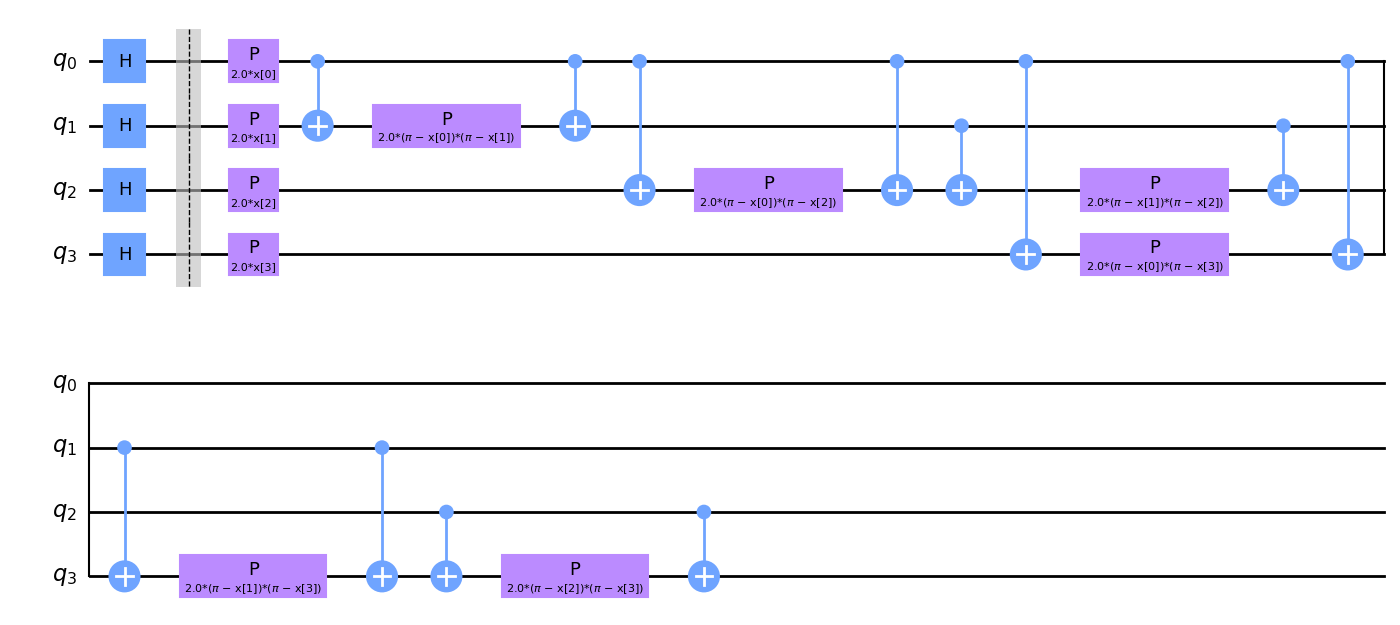

In [13]:
num_features = 4
sv = Statevector.from_label('0' * n)

# use ZZfeatureMap
feature_map = ZZFeatureMap(num_features, reps=1, entanglement='full', data_map_func=None, insert_barriers=True)
feature_map.decompose().draw(output="mpl", fold=20)

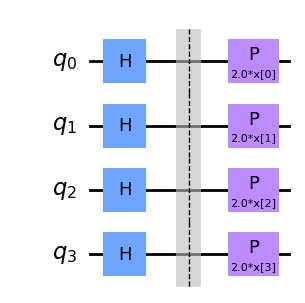

In [14]:
# use ZfeatureMap
z_feature_map = ZFeatureMap(num_features, reps=1, data_map_func=None, insert_barriers=True)
z_feature_map.decompose().draw(output="mpl", fold=10)

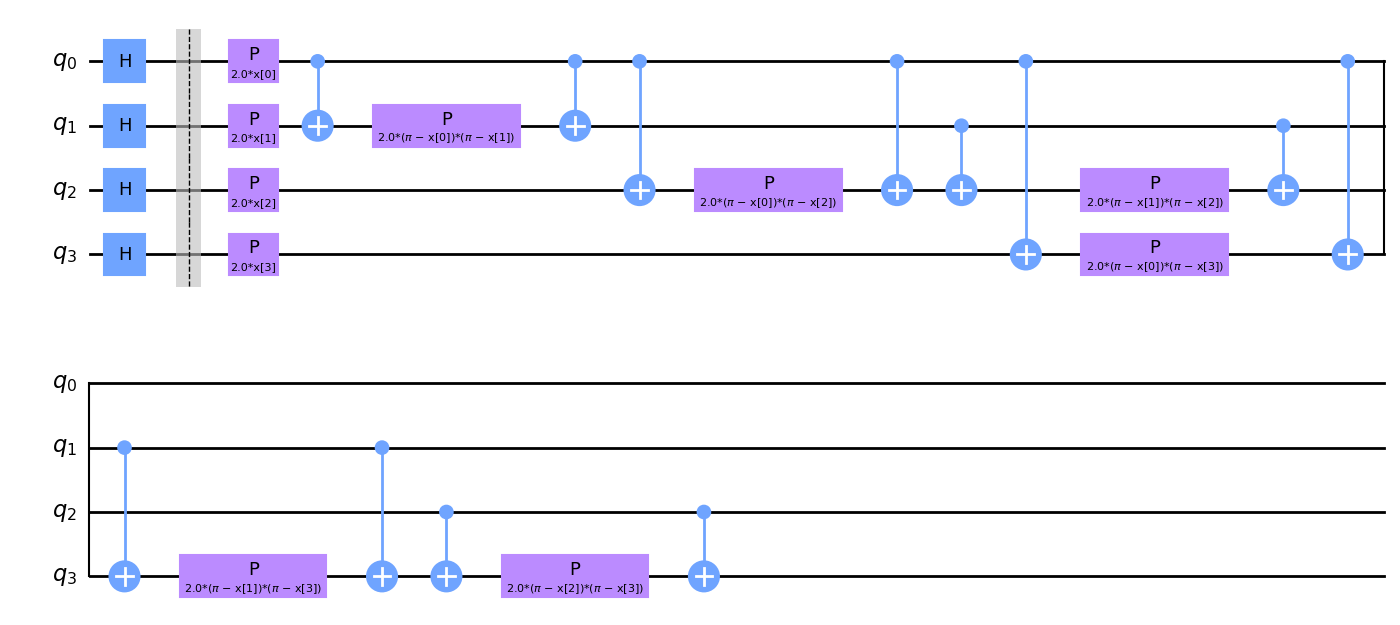

In [15]:
# use ZZfeatureMap
pauli_feature_map = PauliFeatureMap(num_features, reps=1, data_map_func=None, insert_barriers=True)
pauli_feature_map.decompose().draw(output="mpl", fold=20)

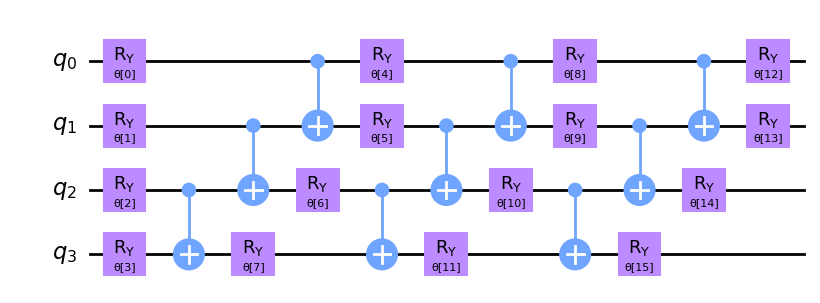

In [16]:
circuit = RealAmplitudes(num_features, reps=3)
circuit.decompose().draw(output="mpl", fold=20)

In [17]:
def get_data_dict(params, x):
    parameters = {}
    print("feature_map", feature_map)
    for i, p in enumerate(feature_map.ordered_parameters):
        parameters[p] = x[i]
    for i, p in enumerate(circuit.ordered_parameters):
        parameters[p] = params[i]
    print(f"size of parameters", parameters)
    for p in parameters:
        print(f"parameters:{p}")
    return parameters

In [18]:
def assign_label(bit_string, class_labels):
    hamming_weight = sum([int(k) for k in list(bit_string)])
    is_odd_parity = hamming_weight & 1
    if is_odd_parity:
        return class_labels[1]
    else:
        return class_labels[0]

In [19]:
def return_probabilities(counts, class_labels):
    shots = sum(counts.values())
    result = {class_labels[0]: 0,
    class_labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, class_labels)
        result[label] += counts[key]/shots
    return result

In [20]:
def classify(x_list, params, class_labels):
    qc_list = []
    for x in x_list:
        circ_ = circuit.assign_parameters(get_data_dict(params, x))
        qc = sv.evolve(circ_)
        qc_list += [qc]
        probs = []
    for qc in qc_list:
        counts = qc.to_counts()
        prob = return_probabilities(counts, class_labels)
        probs += [prob]
    return probs

In [21]:
def mse_cost(probs, expected_label):
    p = probs.get(expected_label)
    actual, pred = np.array(1), np.array(p)
    return np.square(np.subtract(actual,pred)).mean()

In [22]:
cost_list = []
def cost_function(X, Y, class_labels, params, shots=100, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    training_labels = []
    training_samples = []
    for sample in X:
        training_samples += [sample]
    for label in Y:
        if label == 0:
            training_labels += [class_labels[0]]
        elif label == 1:
            training_labels += [class_labels[1]]
    probs = classify(training_samples, params, class_labels)
    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        cost += mse_cost(prob, training_labels[i])
    cost /= len(training_samples)
    # print resulting objective function
    if print_value:
        print('%.4f' % cost)
    # return objective value
    cost_list.append(cost)
    return cost

In [23]:
cost_list = []
optimizer = ADAM(maxiter=100, )

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# # define objective function for training
# objective_function = lambda params: cost_function(X_train, Y_train, class_labels, params, print_value=True)
# # randomly initialize the parameters
# np.random.seed(RANDOM_STATE)
# init_params = 2*np.pi*np.random.rand(n*(1)*2)
# # train classifier
# #opt_params, value, _ = optimizer.optimize(len(init_params), objective_function, initial_point=init_params)
# # print results
# print()
# print('opt_params:', opt_params)
# print('opt_value: ', value)

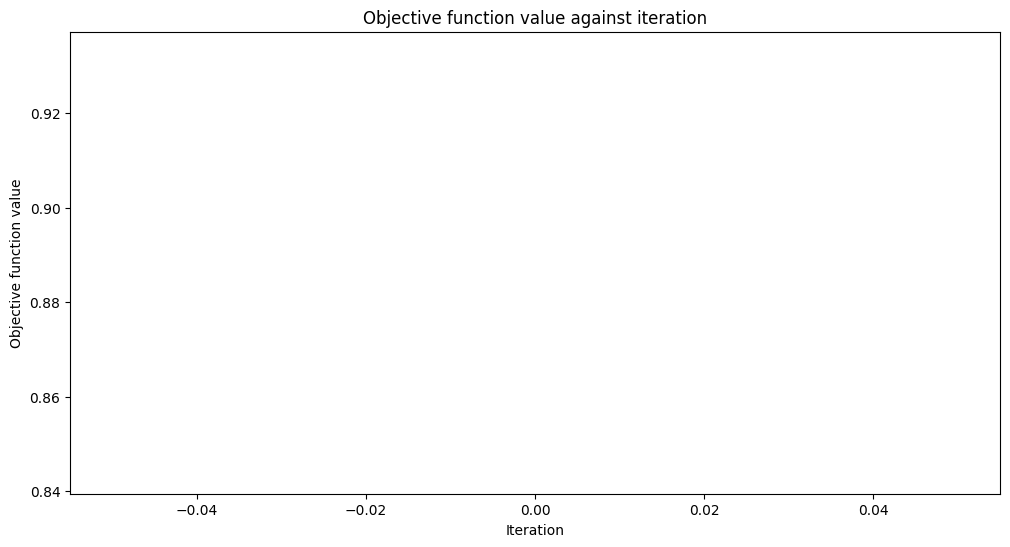

Training time: 1748 seconds


In [24]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    ansatz=circuit,
    optimizer=optimizer,
    callback=callback_graph,
)
# clear objective value history
#objective_func_vals = []

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [42]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(205, 4)
(88, 4)
(205,)
(88,)


In [26]:
train_score_q4 = vqc.score(X_train, Y_train)
test_score_q4 = vqc.score(Y_train, Y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

QiskitMachineLearningError: 'Input data has incorrect shape, last dimension is not equal to the number of inputs: 4, but got: 205.'

In [ ]:
fig = plt.figure()
plt.plot(range(0,901,1), cost_list)
plt.xlabel('Steps')
plt.ylabel('Cost value')
plt.title("ADAM Cost value against steps")
plt.show()
fig.savefig('../../Output/Figures/costvssteps.jpeg')

In [ ]:
def test_model(X, Y, class_labels, params):
    accuracy = 0
    training_labels = []
    training_samples = []
    for sample in X:
        training_samples += [sample]
    probs = classify(training_samples, params, class_labels)
    for i, prob in enumerate(probs):
        if (prob.get('yes') >= prob.get('no')) and (Y_test[i] == 0):
            accuracy += 1
        elif (prob.get('no') >= prob.get('yes')) and (Y_test[i] == 1):
            accuracy += 1
    accuracy /= len(Y_test)
    print("Test accuracy: {}\n".format(accuracy))

In [ ]:
test_model(X_test, Y_test, class_labels, opt_params)